In [3]:
# Imports
import numpy as np
import plotting_master as pm
import run

# -- Parameters --
number_of_companies = 1000
number_of_workers = 20 * number_of_companies 
salary_increase = 0.035
interest_rate_free = 0.0  # "variable" or float
mutation_magnitude = 1  # Float, "spread", "last_T"
salary_min = 0.1 * mutation_magnitude
prob_exponent = 1
warmup_steps = 100  # 2100
time_steps = 800 + warmup_steps 
seed = 666 # np.random.randint(0, 10000)

# Bankruptcy: negative_mon*ey, cannot_pay_salary
# mutation: "constant", "spread", "last_T", "minimum", "log", "mean", "worker_opinion", "0_to_mean", "normal", "positive_income"
update_methods = {"worker_update": "limited", 
                  "bankruptcy": "negative_money",
                  "mutation": "positive_income", # positive_income!
                  "transaction_method": "salary",  # wage or salary
                  "include_bankrupt_salary_in_mu": False,
                  }  


# Create instances
create_data = run.RunWorkForce(number_of_companies, number_of_workers, salary_increase, 
                            interest_rate_free, mutation_magnitude, prob_exponent, salary_min, update_methods, time_steps, seed)
gname = create_data._get_group_name()
plotter = pm.PlotMaster(gname, skip_values=warmup_steps)

# plotter.add_file_name_to_figure_name = False
# plotter.add_parameter_text_to_plot = False

### Store values

### Density graphs

In [4]:
create_data.store_data_in_group()     

Storing data in Steps900_N1000_W20000_ds0.035_m1_rf0.0_alpha1_smin0.1_seed666


100%|██████████| 899/899 [00:03<00:00, 297.33it/s]


In [ ]:
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False

plotter.KDE_and_diversity(bandwidth_s=0.05, s_lim=(0., 1.3), 
                          bandwidth_C=1, C_lim=(-0.05, 80),
                          eval_points=600, kernel="epanechnikov", C_cmap="magma", percentile_cut=99.9, show_mean=False)
# plotter.KDE_and_diversity(bandwidth_s=0.004, s_lim=(0.000, 0.18), bandwidth_C=0.1, C_lim=(0., 5), eval_points=400, kernel="epanechnikov", C_logscale=True, C_cmap="plasma")


# plotter.plot_running_KDE(bandwidth_s=0.004, bandwidth_d=0.15, s_lim=(0.000, 0.12), d_lim=(0.001, 6), eval_points=200, kernel="epanechnikov", show_mean=True, plot_debt=False)
# normale bandwidth: 0.0005, 0.15

In [ ]:
plotter.plot_increased_decreased(window_size=10, bandwidth_s=0.15, s_lim=(2, 4.), eval_points=400,)

In [ ]:
plotter.single_KDE(x_data="salary", time_point=70, eval_points=400, bandwidth=0.0005, kernel="epanechnikov")

### General behaviour

In [7]:
mu = plotter.mu
W = plotter.W
w_not_payed = plotter.w_not_payed
s = plotter.s

mu_full = mu / (W - w_not_payed)

print(mu_full.max())

1.352813852813853


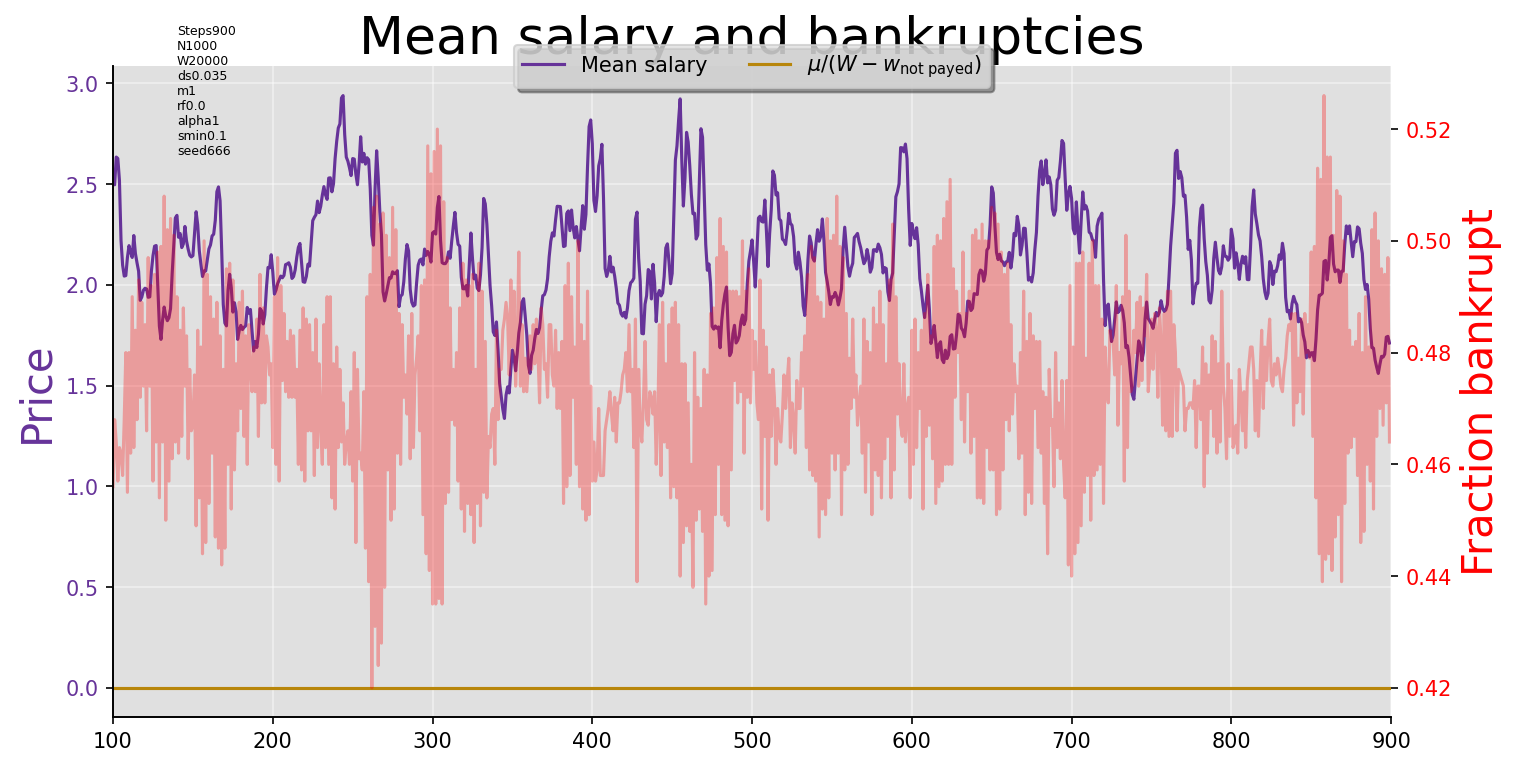

In [5]:
plotter.plot_salary(show_spread=False)

In [ ]:
plotter.plot_capital()

In [ ]:
plotter.plot_single_companies(N_plot=1)

In [ ]:
plotter.add_parameter_text_to_plot = False

xlim_worker_log = (8e-2, 3e3)
xlim_worker_linear = (-1, 2800)
ylim_worker = (8e-9, 1)
plotter.plot_worker_KDE(bandwidth=0.75, N_eval_points=500, log_xscale=False, xlim=xlim_worker_linear, ylim=ylim_worker)
plotter.plot_worker_distribution(ylim=ylim_worker, xlim=xlim_worker_linear, Nbins=500, xscale="linear")

In [ ]:
plotter.add_parameter_text_to_plot = False
plotter.plot_mu_mean_s_diversity()

In [ ]:
plotter.plot_salary_and_debt_distributions()

### Stylized facts

In [ ]:
print("N = ", number_of_companies, "W = ", number_of_workers, "alpha = ", prob_exponent)


plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False
# plotter.mu_return(yscale="linear")
# plotter.plot_return_distribution(data_name="capital_individual_mean", yscale="log", Nbins=None, ylim=(5e-4, 4e1))

plotter.plot_return_individual_and_aggregate(Nbins_agg=None, Nbins_indi=None, ylim=(1e-3, 1.5))

# The different types of return definitions
# plotter.plot_different_return_distribution_definitions(Nbins=None, Nbins_indi=None, ylim=(None, 4e1))

In [ ]:
return_gname_list = create_data.generate_system_data(alpha_values=[1, 4, 1, 4], N_values=[100, 100, 1000, 1000], W_factor=20, store_data=False)
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False
plotter.plot_multiple_return(group_name_list=return_gname_list, ylim=(5e-4, 3e1), same_bins=False)

In [ ]:
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False

plotter.plot_mu_return_different_time(data_name="capital_individual_mean", time_period_list=[1, 5, 25], yscale="log", gauss_std=0.5)

In [ ]:
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False
plotter.plot_autocorr(data_name="capital_individual_mean", max_lag=30, time_period=1, same_subplot=True)

### Niche behaviour graphs

In [ ]:
plotter.plot_mutations()

In [ ]:
plotter.plot_bankrupt_new_salary()

In [ ]:
plotter.animate_w0_wnon0(skip_time_steps=5);

In [ ]:
plotter.plot_time_from_income_change_to_bankruptcy_distribution(show_plot=False)

In [ ]:
plotter.plot_survivors(show_peak_plot=False)

In [ ]:
plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
plotter.plot_diversity()

### Parameter investigations

In [ ]:
# Create all datasets and store them. Does not store group names
# create_data.repeated_m_runs(N_repeat=2, m_values=np.geomspace(1e-1, 1e1, 3))
create_data.multiple_s_min_runs(s_min_list=np.geomspace(1e-8, 5e-2, 8))

In [ ]:
# Big data set: (check filename otherwise)
# steps: 3100, 6000
# seed: 999
# list_of_group_name_ds_arr = create_data.generate_ds_tensor_data(ds_vals=np.linspace(0.005, 0.05, 9), N_repeat=10, 
#                                                     alpha_vals=[1, 2, 4], N_vals=[50, 50, 500, 500], W_vals=[50, 250, 500, 2500],
#                                                     store_data=False)


list_of_group_name_ds_arr = create_data.generate_ds_tensor_data(ds_vals=np.linspace(0.005, 0.05, 9), N_repeat=10, 
                                                    alpha_vals=[1, 4], N_vals=[100, 1000], W_vals=[2000, 20_000],
                                                    store_data=False)

In [ ]:
# oscillation frequency vs ds
plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
plotter.plot_ds_frequency_multiple_datasets(list_of_group_name_ds_arr, data_name="mu")

In [ ]:
group_name_ds_arr = create_data.generate_ds_arr_data(ds_vals=np.linspace(0.005, 0.08, 10), N_repeat=10, store_data=False)
plotter.plot_var_frequency(group_name_ds_arr, var_name="ds", data_name="salary", show_fit_results=True)

In [ ]:
# -- TIME SCALE, ALPHA, N, W --
plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
KDE_div_gname_list = create_data.generate_system_data(alpha_values=[1, 4, 1, 4], N_values=[100, 100, 1000, 1000], 
                                                      W_factor=20, store_data=False)

list_of_group_name_ds_arr = create_data.generate_ds_tensor_data(ds_vals=np.linspace(0.005, 0.05, 8), N_repeat=10, 
                                                    alpha_vals=[1, 4], N_vals=[100, 1000], W_vals=[2000, 20_000],
                                                    time_steps=5000+warmup_steps, store_data=False)

plotter.KDE_diversity_multiple_and_time_scale(KDE_div_gname_list, list_of_group_name_ds_arr, bandwidth_s=0.004, s_lim=(0.000, 0.18), eval_points=200, kernel="epanechnikov",)

In [ ]:
create_data.ds = 0.05
KDE_div_gname_list = create_data.generate_system_data(alpha_values=[1, 4, 1, 4], N_values=[100, 100, 1000, 1000], 
                                                      W_factor=20, store_data=False)

plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
plotter.plot_power_spectrum(KDE_div_gname_list)

In [ ]:
# -- Exponent investigation (alpha) --
group_name_list_alpha = create_data.generate_alpha_arr_data(alpha_vals=[0, 2, 4], N_repeat=1, store_data=True)

plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False

# plotter.plot_multiple_alpha(group_name_list_alpha, same_plot=False)
# plotter.plot_alpha_frequency(group_name_list_prob_expo)
# plotter.plot_min_max_vs_alpha(group_name_list_alpha_arr[:-1], data_name="salary")
# plotter.plot_min_max_vs_alpha(group_name_list_alpha_arr[:-1], data_name="mu")
plotter.plot_diversity_multiple_alpha(group_name_list_alpha)

In [ ]:
# -- Mutation size investigation -- 
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False
group_name_list_mutation_arr = create_data.generate_m_arr_data(m_vals=np.geomspace(1e-1, 1e2, 8), N_repeat=15, linear_smin=False, store_data=True)
group_name_list_mutation_arr_linear_smin = create_data.generate_m_arr_data(m_vals=np.geomspace(1e-1, 1e2, 8), N_repeat=15, linear_smin=True, store_data=True)

# plotter.plot_multiple_m(group_name_list_mutation, same_plot=True)
# plotter.plot_m_frequency(group_name_list_mutation)
# plotter.plot_m_power_spectrum(group_name_list_mutation)
plotter.plot_min_max_vs_m(group_name_list_mutation_arr, data_name="mu")
plotter.plot_min_max_vs_m(group_name_list_mutation_arr_linear_smin, data_name="mu")

In [ ]:
# -- ds investigation --


# plotter.plot_multiple_ds(group_name_list_ds[4:], same_plot=False)
# plotter.plot_ds_power_spectrum(group_name_list_ds)


plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
plotter.plot_var_frequency(group_name_list=group_name_ds_arr, var_name="ds", data_name="mu", show_second_dominant_freq=True, points_to_exclude_from_fit=3)
plotter.plot_var_frequency(group_name_list=group_name_ds_arr, var_name="ds", data_name="salary", show_second_dominant_freq=True, points_to_exclude_from_fit=1)

In [ ]:
# -- smin -- 
group_name_list_salary_min = create_data.generate_smin_arr_data(smin_vals=[1e-4, 1e-2], N_repeat=1, store_data=True)

plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False

# plotter.plot_multiple_s_min(group_name_list_salary_min)
plotter.plot_running_KDE_multiple_s_min(group_name_list_salary_min, bandwidth_s=0.005, s_lim=(0, 0.15), eval_points=400, kernel="epanechnikov", show_mean=False,)

In [ ]:
# -- N and W investigation --
N_values = np.array([1000])
W_values = 1 * N_values

group_name_list_N_var_W_const, group_name_list_N_W_ratio = create_data.generate_N_W_arr_data(N_values=N_values, 
                                                                                             W_values=W_values,
                                                                                             ratio_vals=[5, 20, 50, 100], 
                                                                                             number_of_repeats=1, store_data=True)

# Mean plots
# plotter.plot_N_var_W_const(group_name_list_N_var_W_const)
plotter.plot_N_W_ratio(group_name_list_N_W_ratio, show_bankruptcy=True)

# KDE
plotter.plot_running_KDE_NW(group_name_list_N_W_ratio, bandwidth=0.005, eval_points=200, lim=(0, 0.15), kernel="epanechnikov", show_mean=False)